In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
sns.set()
plt.style.use("ggplot")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('C:\\temp_exp_datas\\with_9E-4_current\\corrected_data.csv')

In [3]:
#data["temperature"] = [abs(i) for i in data["temperature"]]

In [4]:
data.head()

,time,current[mA],RANGE1[V],RANGE2[V],RANGE3[V],RANGE4[V],24bit[bin],dcct_temperature,supply_temperature
0,11:25:58,0.0009,0.042899,0.438525,4.382837,5.648209,73814,-0.139317,0.293008
1,11:26:08,0.0009,0.042901,0.438688,4.383354,5.648534,73847,-0.139309,0.293309
2,11:26:18,0.0009,0.042902,0.438680,4.382241,5.648690,73841,-0.139312,0.293532
3,11:26:28,0.0009,0.042901,0.438616,4.383547,5.648804,73867,-0.139307,0.293717
4,11:26:38,0.0009,0.042900,0.438672,4.383401,5.648888,73819,-0.139316,0.293944


In [44]:
data.tail()

,time,current[mA],RANGE1[V],RANGE2[V],RANGE3[V],RANGE4[V],24bit[bin],dcct_temperature,supply_temperature,hours
8630,11:24:18,0.0009,0.042871,0.438542,4.383435,5.650479,73836,-0.139159,0.300854,11
8631,11:24:28,0.0009,0.042886,0.438627,4.383257,5.650463,73843,-0.139171,0.300938,11
8632,11:24:38,0.0009,0.042871,0.438414,4.381102,5.650513,73817,-0.139170,0.300965,11
8633,11:24:48,0.0009,0.042874,0.438449,4.381061,5.650460,73808,-0.139169,0.300986,11
8634,11:24:58,0.0009,0.042889,0.438533,4.382417,5.650464,73834,-0.139169,0.300993,11


In [49]:
times = data["time"]
data["hours"] = [time[0:2] for time in times]
data["hoursandmins"] = [time[0:5] for time in times]

In [5]:
corr_data = data[["RANGE1[V]", "RANGE2[V]", "RANGE3[V]", "RANGE4[V]", "supply_temperature", "dcct_temperature", "24bit[bin]"]]

In [6]:
corr_data["supply_temperature"] = [abs(temp)/(5*10**-3) for temp in corr_data["supply_temperature"] ]

C:\Users\aunal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
corr_data["dcct_temperature"] = [abs(temp)/(5*10**-3) for temp in corr_data["dcct_temperature"] ]

C:\Users\aunal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
corr_data.head()

,RANGE1[V],RANGE2[V],RANGE3[V],RANGE4[V],supply_temperature,dcct_temperature,24bit[bin]
0,0.042899,0.438525,4.382837,5.648209,58.601553,27.863394,73814
1,0.042901,0.438688,4.383354,5.648534,58.661891,27.861862,73847
2,0.042902,0.438680,4.382241,5.648690,58.706489,27.862424,73841
3,0.042901,0.438616,4.383547,5.648804,58.743330,27.861306,73867
4,0.042900,0.438672,4.383401,5.648888,58.788895,27.863296,73819


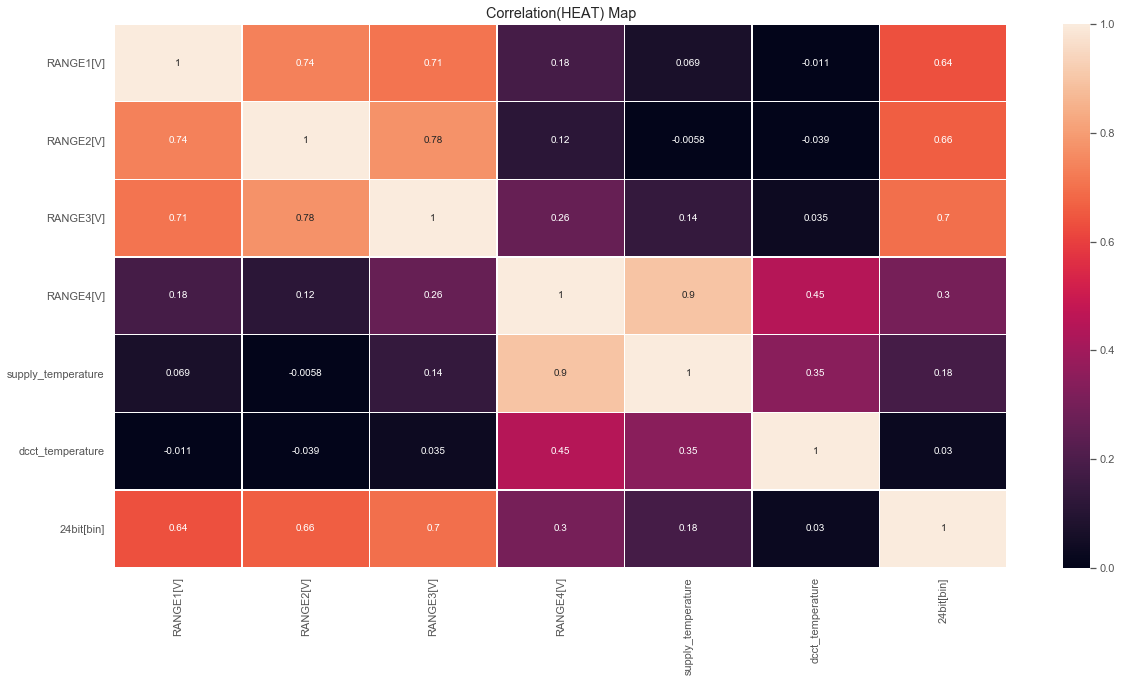

In [11]:
f, ax = plt.subplots(figsize = (20, 10))
heat_map = sns.heatmap(corr_data.corr(), vmin = 0, vmax = 1, annot = True, linewidths = .5, ax = ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlation(HEAT) Map')
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\heatmap.png")

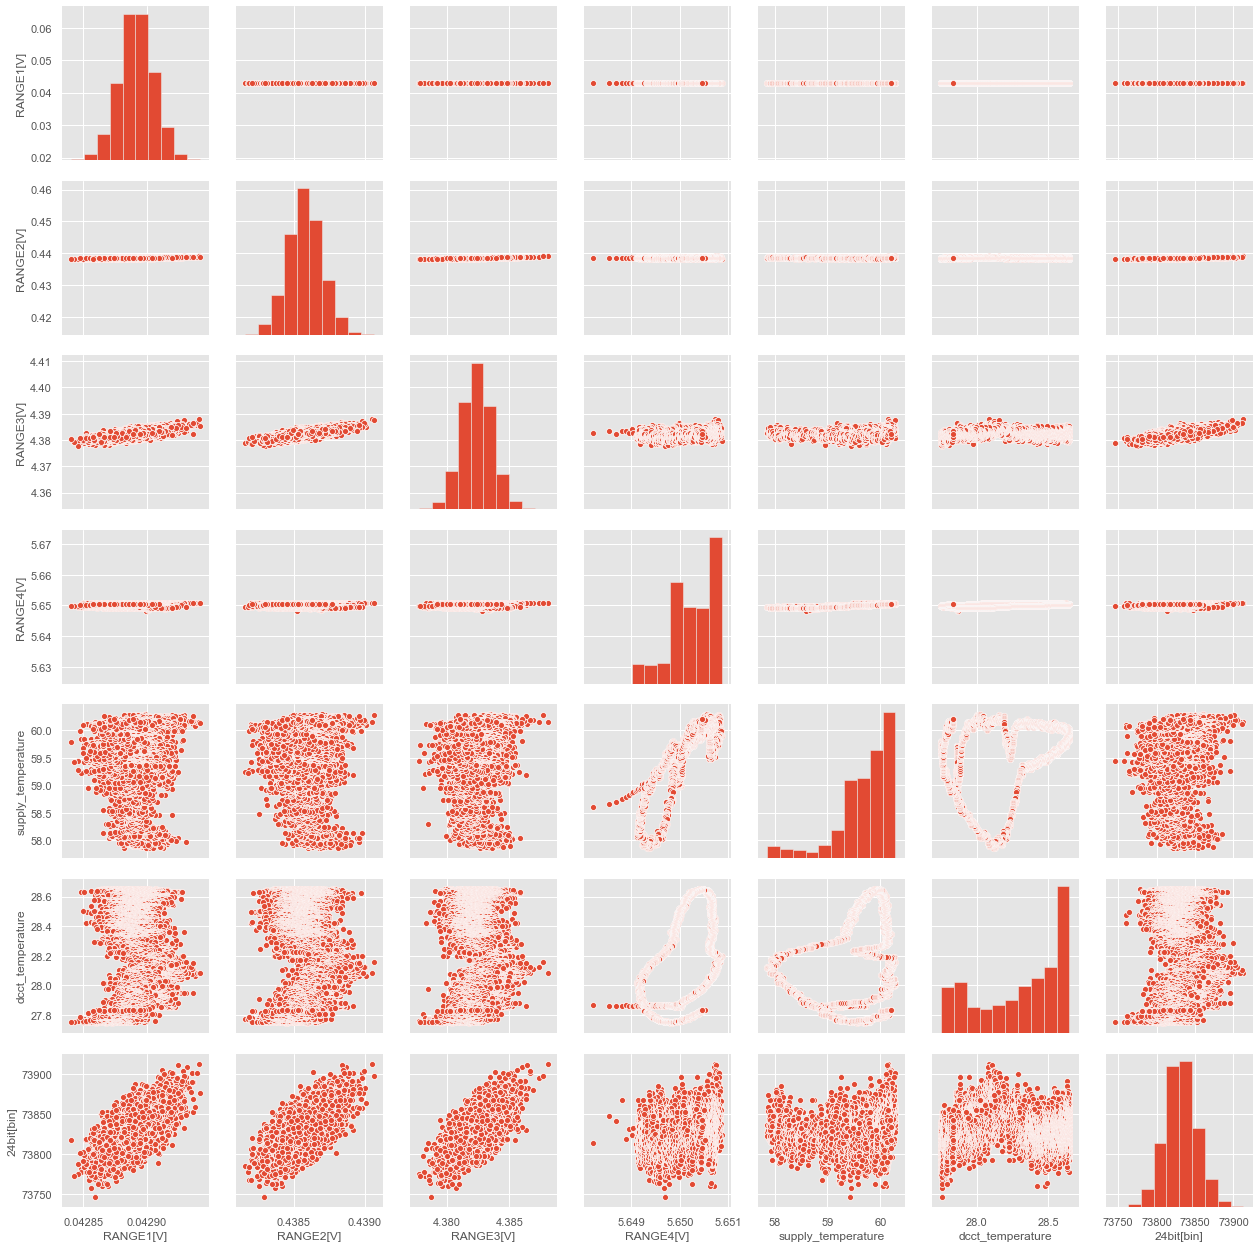

In [12]:
pair_plot = sns.pairplot(corr_data)
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\pair_plot.png")

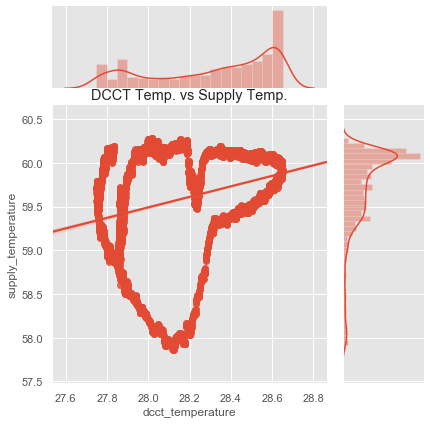

In [13]:
#f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.jointplot(corr_data["dcct_temperature"], corr_data["supply_temperature"], data = corr_data, ratio = 3, kind = "regg")
plt.title("DCCT Temp. vs Supply Temp.")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\supply_vs_dcct_temps.png")

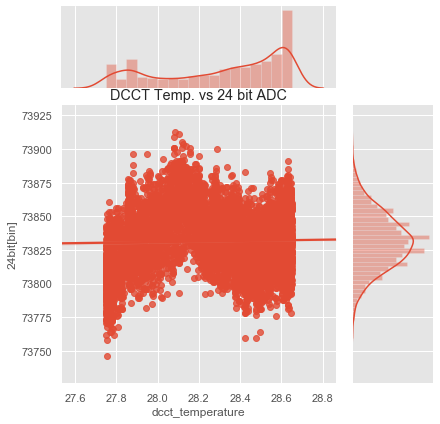

In [14]:
sns.jointplot(corr_data["dcct_temperature"], corr_data["24bit[bin]"], data = corr_data, ratio = 3, kind = "regg")
plt.title("DCCT Temp. vs 24 bit ADC")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\dcct_temp_vs_24bitadc.png")

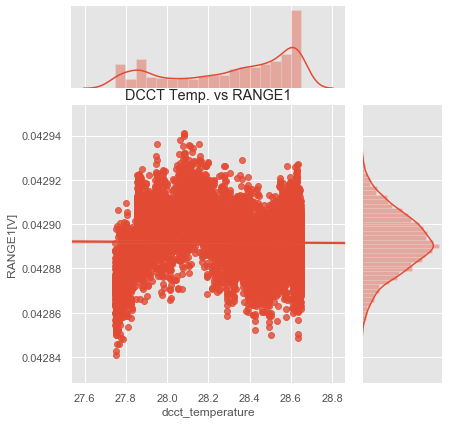

In [15]:
sns.jointplot(corr_data["dcct_temperature"], corr_data["RANGE1[V]"], data = corr_data, ratio = 3, kind = "regg")
plt.title("DCCT Temp. vs RANGE1")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\dcct_temp_vs_range1.png")

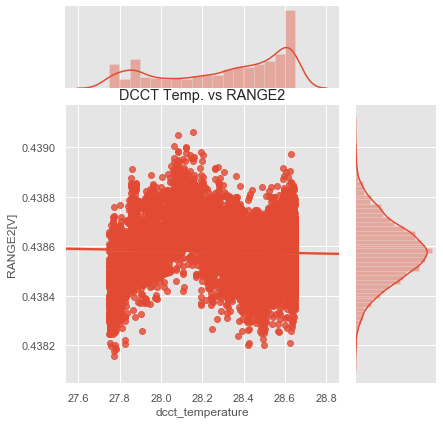

In [16]:
sns.jointplot(corr_data["dcct_temperature"], corr_data["RANGE2[V]"], data = corr_data, ratio = 3, kind = "regg")
plt.title("DCCT Temp. vs RANGE2")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\dcct_temp_vs_range2.png")

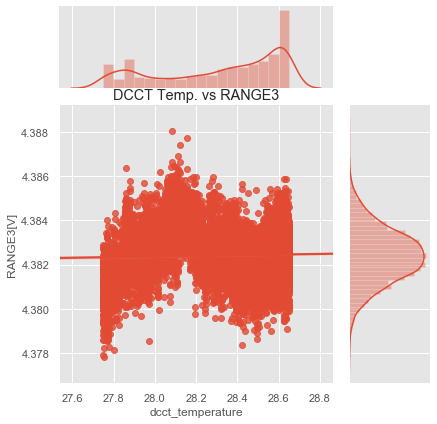

In [17]:
sns.jointplot(corr_data["dcct_temperature"], corr_data["RANGE3[V]"], data = corr_data, ratio = 3, kind = "regg")
plt.title("DCCT Temp. vs RANGE3")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\dcct_temp_vs_range3.png")

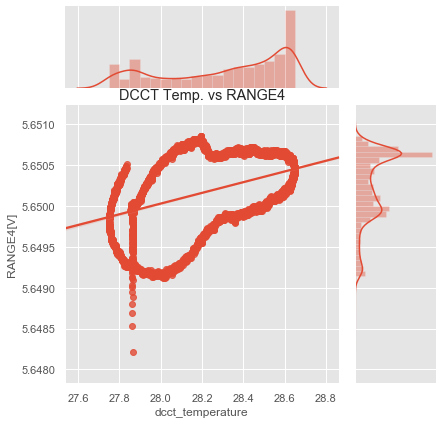

In [18]:
sns.jointplot(corr_data["dcct_temperature"], corr_data["RANGE4[V]"], data = corr_data, ratio = 3, kind = "regg")
plt.title("DCCT Temp. vs RANGE4")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\dcct_temp_vs_range4.png")

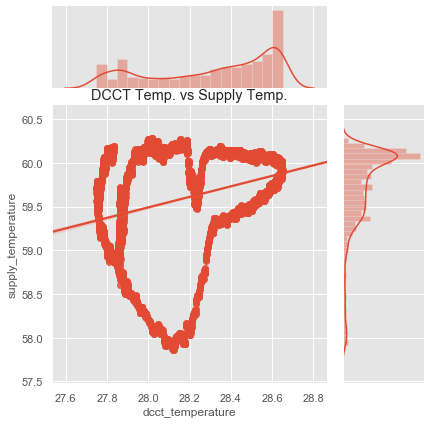

In [20]:
sns.jointplot(corr_data["dcct_temperature"], corr_data["supply_temperature"], data = corr_data, ratio = 3, kind = "regg")
plt.title("DCCT Temp. vs Supply Temp.")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\dcct_temp_vs_supply_temp.png")

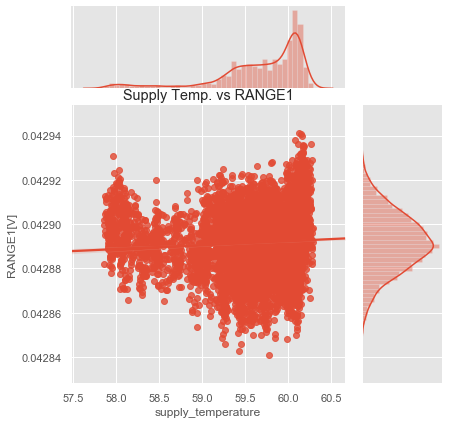

In [21]:
sns.jointplot(corr_data["supply_temperature"], corr_data["RANGE1[V]"], data = corr_data, ratio = 3, kind = "regg")
plt.title("Supply Temp. vs RANGE1")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\supply_temp_vs_range1_temp.png")

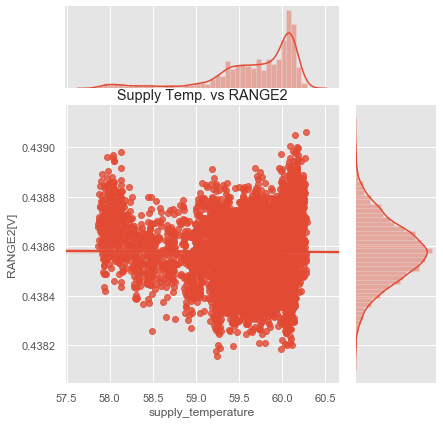

In [22]:
sns.jointplot(corr_data["supply_temperature"], corr_data["RANGE2[V]"], data = corr_data, ratio = 3, kind = "regg")
plt.title("Supply Temp. vs RANGE2")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\supply_temp_vs_range2_temp.png")

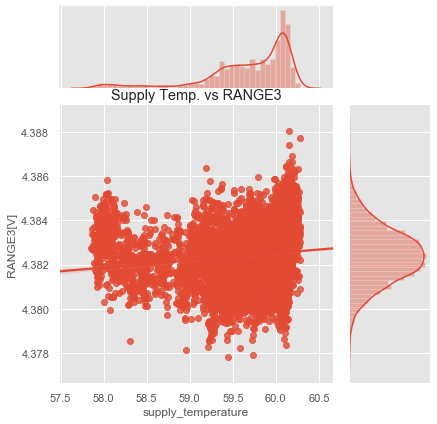

In [23]:
sns.jointplot(corr_data["supply_temperature"], corr_data["RANGE3[V]"], data = corr_data, ratio = 3, kind = "regg")
plt.title("Supply Temp. vs RANGE3")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\supply_temp_vs_range3_temp.png")

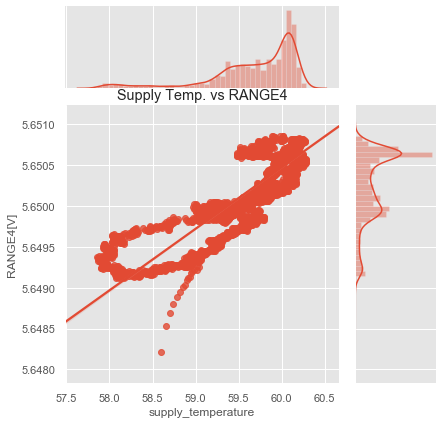

In [24]:
sns.jointplot(corr_data["supply_temperature"], corr_data["RANGE4[V]"], data = corr_data, ratio = 3, kind = "regg")
plt.title("Supply Temp. vs RANGE4")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\supply_temp_vs_range4_temp.png")

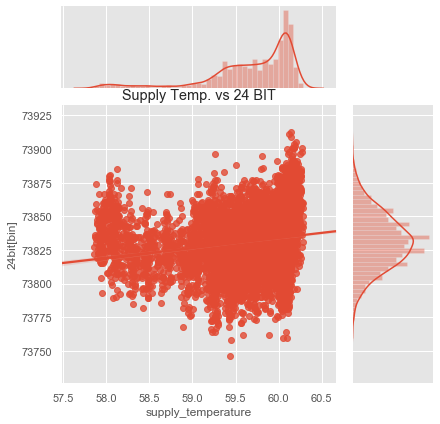

In [25]:
sns.jointplot(corr_data["supply_temperature"], corr_data["24bit[bin]"], data = corr_data, ratio = 3, kind = "regg")
plt.title("Supply Temp. vs 24 BIT")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\supply_temp_vs_24bit.png")

In [193]:
sns.jointplot(data["supply_temperature"], data["measured_current[V]"], data = data, ratio = 3, kind = "regg")
plt.title("Supply Temp. vs Measured Current")
plt.savefig("C:\\data\\supply_temp_vs_measured_current.png")

KeyError: 'measured_current[V]'

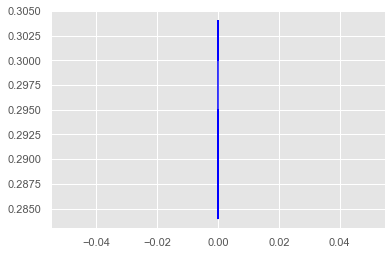

In [194]:
plt.plot(data["current[mA]"], data["supply_temperature"], color = "blue")
plt.show()

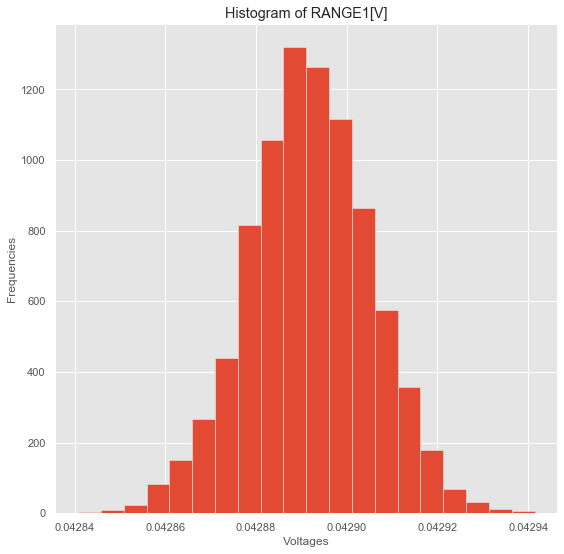

In [26]:
f, ax = plt.subplots(figsize = (9, 9))
range1_list = list(corr_data["RANGE1[V]"])
plt.hist(range1_list, bins = 20)
plt.xlabel("Voltages")
plt.ylabel("Frequencies")
plt.title("Histogram of RANGE1[V]")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\range1_hist.png")

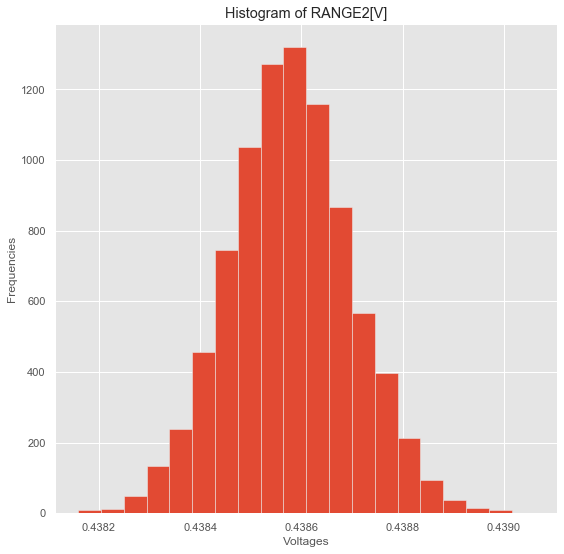

In [27]:
f, ax = plt.subplots(figsize = (9, 9))
plt.hist(corr_data["RANGE2[V]"], bins = 20)
plt.xlabel("Voltages")
plt.ylabel("Frequencies")
#plt.xticks(rotation=90)
plt.title("Histogram of RANGE2[V]")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\range2_hist.png")

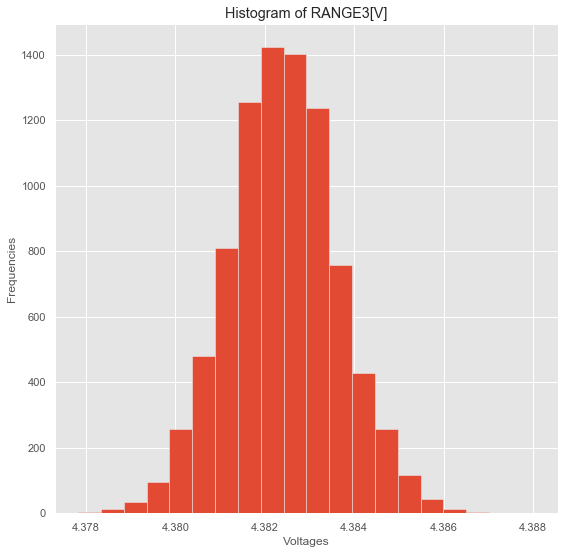

In [28]:
f, ax = plt.subplots(figsize = (9, 9))
plt.hist(corr_data["RANGE3[V]"], bins = 20)
plt.xlabel("Voltages")
plt.ylabel("Frequencies")
#plt.xticks(rotation=90)
plt.title("Histogram of RANGE3[V]")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\range3_hist.png")

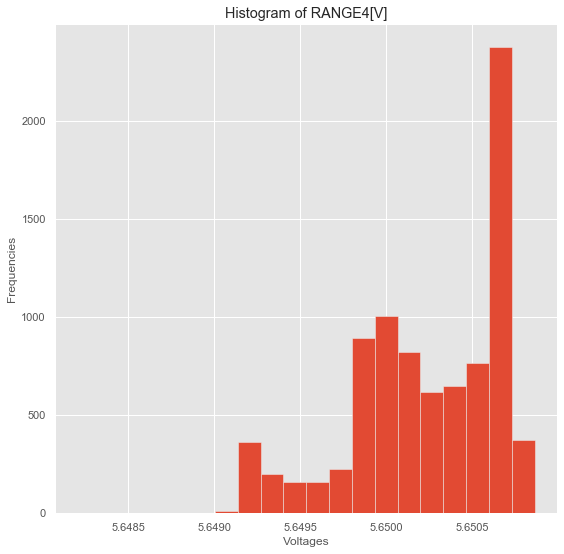

In [29]:
f, ax = plt.subplots(figsize = (9, 9))
plt.hist(corr_data["RANGE4[V]"], bins = 20)
plt.xlabel("Voltages")
plt.ylabel("Frequencies")
#plt.xticks(rotation=90)
plt.title("Histogram of RANGE4[V]")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\range4_hist.png")

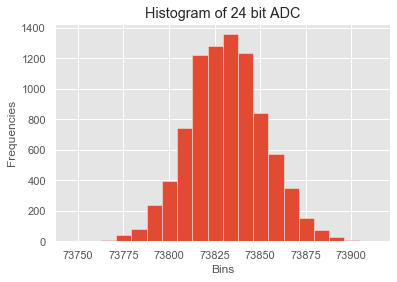

In [30]:
plt.hist(corr_data["24bit[bin]"], bins = 20)
plt.xlabel("Bins")
plt.ylabel("Frequencies")
plt.title("Histogram of 24 bit ADC")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\adc_hist.png")

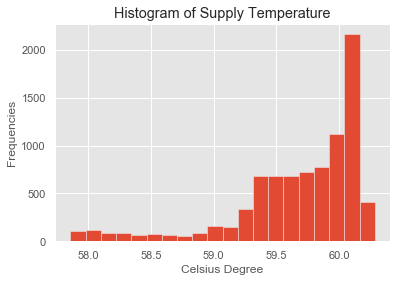

In [31]:
plt.hist(corr_data["supply_temperature"], bins = 20)
plt.xlabel("Celsius Degree")
plt.ylabel("Frequencies")
plt.title("Histogram of Supply Temperature")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\supply_temperature_hist.png")

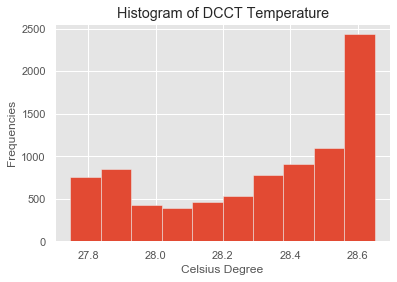

In [32]:
plt.hist(corr_data["dcct_temperature"], bins = 10)
plt.xlabel("Celsius Degree")
plt.ylabel("Frequencies")
plt.title("Histogram of DCCT Temperature")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\dcct_temperature_hist.png")

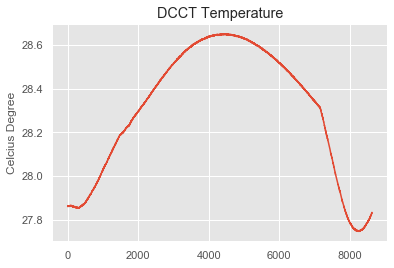

In [33]:
plt.plot(corr_data["dcct_temperature"])
plt.ylabel("Celcius Degree")
plt.title("DCCT Temperature")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\dcct_temperature_plot.png")

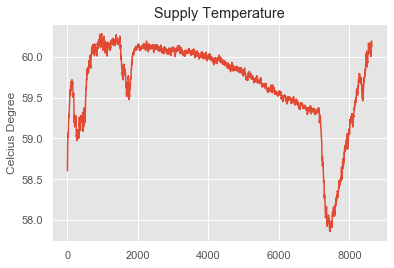

In [34]:
plt.plot(corr_data["supply_temperature"])
plt.ylabel("Celcius Degree")
plt.title("Supply Temperature")
plt.savefig("C:\\temp_exp_datas\\with_9E-4_current\\supply_temperature_plot.png")

In [43]:
unique_hours = data["hours"].unique()
unique_hours

array(['11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '00', '01', '02', '03', '04', '05', '06', '07', '08',
       '09', '10'], dtype=object)

In [50]:
data.head()

,time,current[mA],RANGE1[V],RANGE2[V],RANGE3[V],RANGE4[V],24bit[bin],dcct_temperature,supply_temperature,hours,hoursandmins
0,11:25:58,0.0009,0.042899,0.438525,4.382837,5.648209,73814,-0.139317,0.293008,11,11:25
1,11:26:08,0.0009,0.042901,0.438688,4.383354,5.648534,73847,-0.139309,0.293309,11,11:26
2,11:26:18,0.0009,0.042902,0.438680,4.382241,5.648690,73841,-0.139312,0.293532,11,11:26
3,11:26:28,0.0009,0.042901,0.438616,4.383547,5.648804,73867,-0.139307,0.293717,11,11:26
4,11:26:38,0.0009,0.042900,0.438672,4.383401,5.648888,73819,-0.139316,0.293944,11,11:26


In [59]:
time_values = []
dcct_temp = []
supply_temp = []
for hour in unique_hours:
    time = hour + ":00:08" 
    filter1 = data["time"] == time
    new_data = data[filter1]
    time_values.append(str(new_data["time"]))
    dcct_temp.append(str(new_data["dcct_temperature"]))
    supply_temp.append(str(new_data["supply_temperature"]))

print(time_values)
#plt.plot(time_values, supply_temp)
#plt.show()

['8485    11:00:08\nName: time, dtype: object', '205    12:00:08\nName: time, dtype: object', '565    13:00:08\nName: time, dtype: object', '925    14:00:08\nName: time, dtype: object', '1285    15:00:08\nName: time, dtype: object', '1645    16:00:08\nName: time, dtype: object', '2005    17:00:08\nName: time, dtype: object', '2365    18:00:08\nName: time, dtype: object', '2725    19:00:08\nName: time, dtype: object', '3085    20:00:08\nName: time, dtype: object', '3445    21:00:08\nName: time, dtype: object', '3805    22:00:08\nName: time, dtype: object', '4165    23:00:08\nName: time, dtype: object', '4525    00:00:08\nName: time, dtype: object', '4885    01:00:08\nName: time, dtype: object', '5245    02:00:08\nName: time, dtype: object', '5605    03:00:08\nName: time, dtype: object', '5965    04:00:08\nName: time, dtype: object', '6325    05:00:08\nName: time, dtype: object', '6685    06:00:08\nName: time, dtype: object', '7045    07:00:08\nName: time, dtype: object', '7405    08:00: